<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


# **1. Plot the training data**

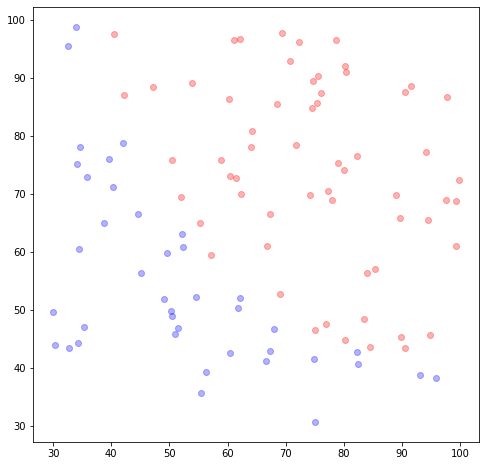

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


# **2. Plot the estimated parameters**

In [134]:
np.random.seed(50)
theta0 = np.random.randn(1)
theta1 = np.random.randn(1)
theta2 = np.random.randn(1)

cost_list = []
theta0_list = []
theta1_list = []
theta2_list = []

alpha = 0.000005
iteration = 100000


for i in range(iteration):

  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2)

  #hypothesis
  z = theta0 + theta1*x + theta2*y
  sigmoid_z = 1/(1 + np.exp(-z))
  error = sigmoid_z - label

  #objective function
  cost = (-label * np.log(sigmoid_z) - (1 - label) * np.log(1 - sigmoid_z)).mean()
  cost_list.append(cost)

  #gradient descent
  theta0_grad = error.mean()
  theta1_grad = (error * x).mean()
  theta2_grad = (error * y).mean()
  
  theta0 = theta0 - alpha * (theta0_grad)
  theta1 = theta1 - alpha * (theta1_grad)
  theta2 = theta2 - alpha * (theta2_grad)
  
print(theta0, theta1, theta2)

[-1.5835578] [0.02156187] [0.01281933]


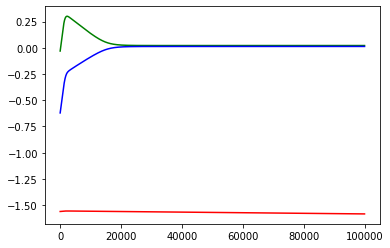

In [135]:
#plotting theta0, theta1 and theta2
plt.plot(range(0, iteration), theta0_list, 'red')
plt.plot(range(0, iteration), theta1_list,'green')
plt.plot(range(0, iteration), theta2_list,'blue')
plt.show()

# **3. Plot the training error**

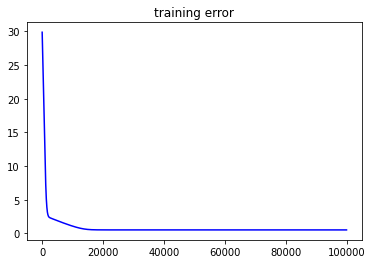

In [136]:
#plot the value of the objective function at every optimization step
plt.plot(range(0, iteration), cost_list, 'blue')
plt.title('training error')
plt.show()

# **4. Plot the obtained classifier**

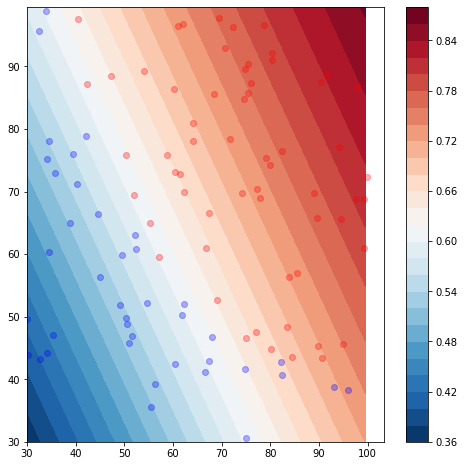

In [141]:
#set range
x_value = np.arange(30, 100, 0.5)
y_value = np.arange(30, 100, 0.5)
X, Y = np.meshgrid(x_value, y_value)

Z = theta0 + X * theta1 + Y * theta2
sigmoid_Z = 1/(1 + np.exp(-Z))

plt.figure(figsize=(8, 8))
color_map = plt.contourf(X, Y, sigmoid_Z, 30, cmap = plt.cm.RdBu_r)
plt.colorbar(color_map)

#plot the training data points
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()